In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy import units as u
from astropy.time import Time
from astropy.coordinates import SkyCoord, EarthLocation, AltAz
from astropy.coordinates import ICRS, Galactic, FK4, FK5

%matplotlib inline

In [101]:
observatories = {'ARO' : EarthLocation(918034.4879*u.m, -4346132.3267*u.m, 4561971.2292*u.m),
                'DRAO' : EarthLocation(lat=49.19*u.deg, lon=-119.37*u.deg, height=545*u.m),
                'GMRT' : EarthLocation(1656988.9135*u.m, 5797576.2281*u.m, 2073756.22*u.m)
                }

#sources = {'b0329' : SkyCoord.from_name('PSRB0329+54'),
#        'b0531' : SkyCoord.from_name('M1'),
#        'b0834' : SkyCoord.from_name('PSRB0834+06'),
#        'b1133' : SkyCoord.from_name('PSRB1133+16'),
#        'b1508' : SkyCoord.from_name('PSRB1508+55'),
#        'j1810' : SkyCoord('18h10m44.815s +17d44m02.25s', FK5),
#        'b1929' : SkyCoord.from_name('PSRB1929+10'),
#        'b1957' : SkyCoord.from_name('PSRB1957+20')
#        }

sources = {'b0329+54' : SkyCoord.from_name('PSRB0329+54'),
        'b0834+06' : SkyCoord.from_name('PSRB0834+06'),
        'b1133+16' : SkyCoord.from_name('PSRB1133+16'),
        'b1508+55' : SkyCoord.from_name('PSRB1508+55'),
        'b1831-03' : SkyCoord.from_name('PSRB1831-03'),
        'b1859+03' : SkyCoord.from_name('PSRB1859+03'),
        'b1957+20' : SkyCoord.from_name('PSRB1957+20')
        }

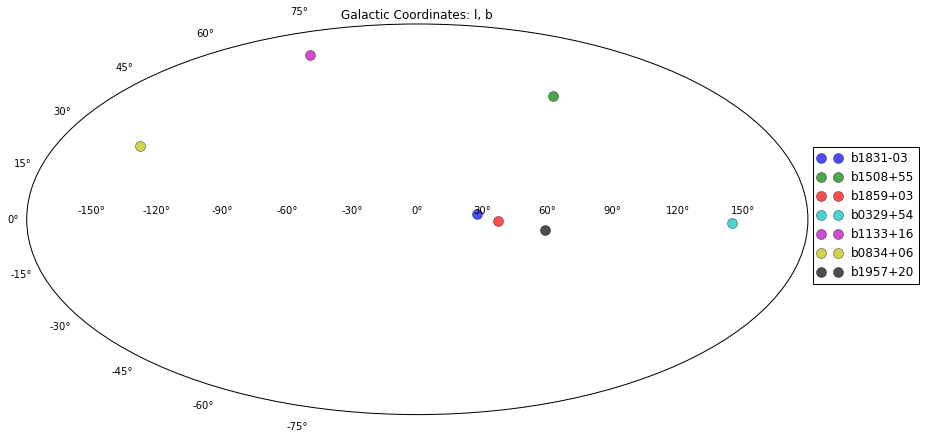

In [104]:
plt.figure(figsize=(14,14))
plt.subplot(111, projection="aitoff")

for key, source in sources.iteritems():
    #ra_rad = source.ra.wrap_at(180 * u.deg).radian
    #dec_rad = source.dec.radian

    ra_rad = source.galactic.l.wrap_at(180 * u.deg).radian
    dec_rad = source.galactic.b.radian

    plt.plot(ra_rad, dec_rad, 'o', markersize=10, alpha=0.7, label=key)

plt.legend(bbox_to_anchor=(1.15, 0.7))
plt.title('Galactic Coordinates: l, b')

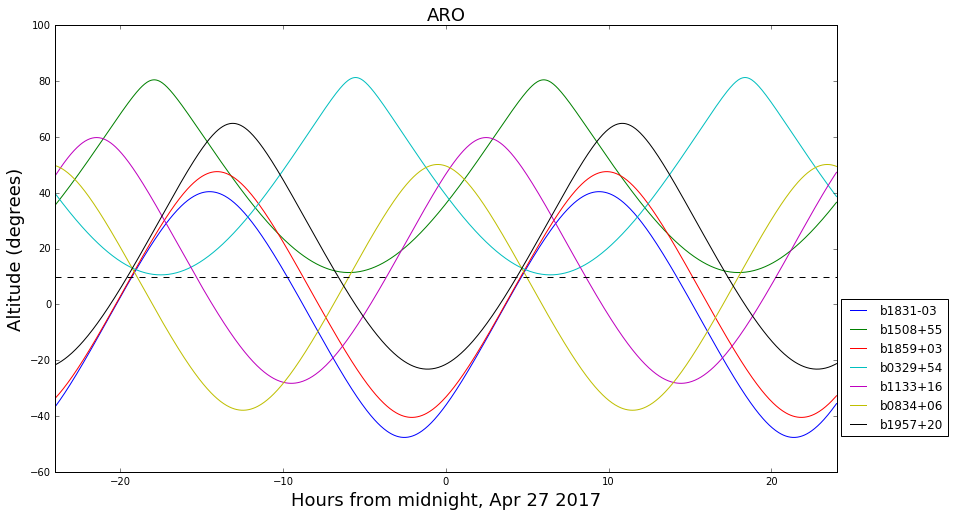

In [105]:
midnight = Time('2017-04-27 00:00:00')
delta_midnight = np.linspace(-24, 24, 1000)*u.hour

observatory = observatories['ARO']
plt.figure(figsize=(14, 8))

for name, source in sources.iteritems():
    altaz = source.transform_to(AltAz(obstime=midnight+delta_midnight, location=observatory))
    plt.plot(delta_midnight, altaz.alt, label=name)

plt.axhline(10, linestyle='--', color='k')
plt.xlim(-24, 24)
plt.legend(bbox_to_anchor=(1.15, 0.4))

plt.ylabel('Altitude (degrees)', fontsize=18)
plt.xlabel('Hours from midnight, Apr 27 2017', fontsize=18)
plt.title('ARO', fontsize=18)

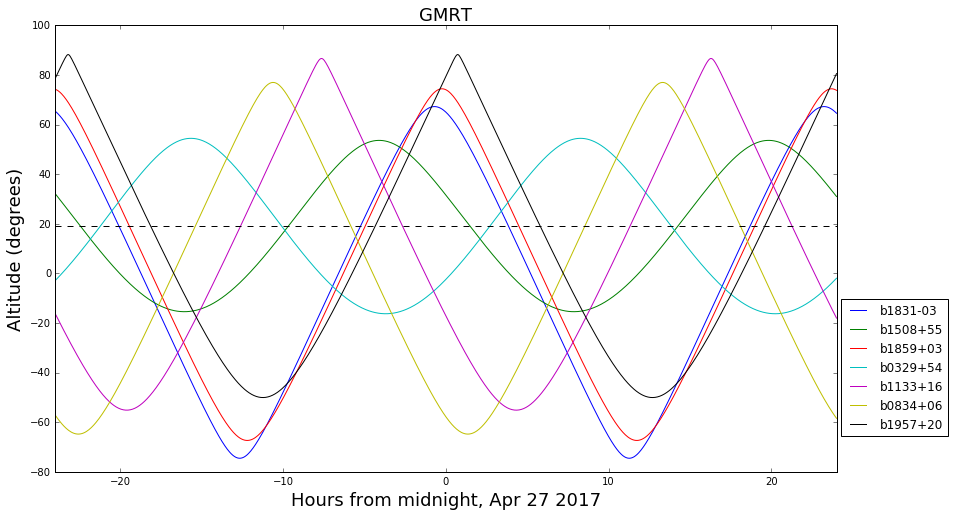

In [108]:
observatory = observatories['GMRT']
plt.figure(figsize=(14, 8))

for name, source in sources.iteritems():
    altaz = source.transform_to(AltAz(obstime=midnight+delta_midnight, location=observatory))
    plt.plot(delta_midnight, altaz.alt, label=name)

plt.axhline(19, linestyle='--', color='k')
plt.xlim(-24, 24)
plt.legend(bbox_to_anchor=(1.15, 0.4))

plt.ylabel('Altitude (degrees)', fontsize=18)
plt.xlabel('Hours from midnight, Apr 27 2017', fontsize=18)
plt.title('GMRT', fontsize=18)

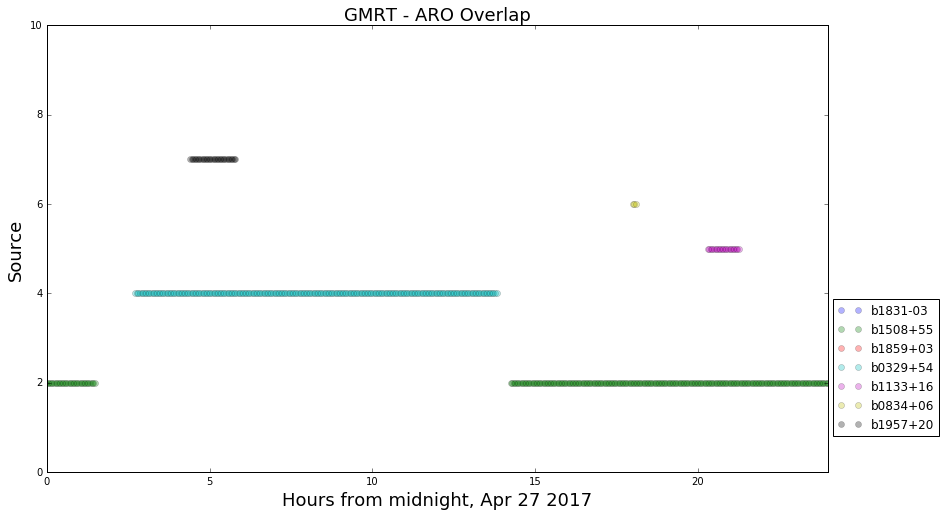

In [110]:
observatory1 = observatories['ARO']
observatory2 = observatories['GMRT']
limit1 = 10.*u.deg
limit2 = 19.*u.deg
plt.figure(figsize=(14, 8))

i = 1

for name, source in sources.iteritems():
    altaz1 = source.transform_to(AltAz(obstime=midnight+delta_midnight, location=observatory1))
    altaz2 = source.transform_to(AltAz(obstime=midnight+delta_midnight, location=observatory2))
    
    al1 = altaz1.alt
    al2 = altaz2.alt

    overlap = np.argwhere( (al1>limit1) & (al2>limit2)).squeeze()
    
    dtoverlap = delta_midnight[overlap]
    
    plt.plot(dtoverlap, np.ones(len(dtoverlap))*i, 'o', label=name, alpha = 0.3)
    
    i += 1
        
plt.xlim(0, 24)
plt.ylim(0,10)
plt.legend(bbox_to_anchor=(1.15, 0.4))

plt.ylabel('Source', fontsize=18)
plt.xlabel('Hours from midnight, Apr 27 2017', fontsize=18)
plt.title('GMRT - ARO Overlap', fontsize=18)